# AVL Tree
## Credit:
https://www.geeksforgeeks.org/avl-tree-set-1-insertion/

**AVL tree** is a self-balancing **Binary Search Tree (BST)** where the difference between heights of left and right subtrees cannot be more than one for all nodes.<br>

 Time complexity : insertion, deletion and search operations take **O(logn)** in both the average and the worst cases.<br>
Space complexity : of an AVL tree is **O(n)** in both the average and the worst case.

In [2]:
import pdb
#pdb.set_trace()
# Python code to insert a node in AVL tree


# Generic tree node class
class TreeNode(object):

	def __init__(self, val):
		self.val = val
		self.left = None
		self.right = None
		self.height = 1



# AVL tree class which supports the Insert operation
class AVL_Tree(object):


	# Recursive function to insert key in subtree rooted with node and returns new root of subtree.
	def insert(self, root, key):

		# Step 1 - Perform normal BST
		if not root:
			return TreeNode(key)
		elif key < root.val:
			root.left = self.insert(root.left, key)
		else:
			root.right = self.insert(root.right, key)

		# Step 2 - Update the height of the ancestor node
		root.height = 1 + max(self.getHeight(root.left), self.getHeight(root.right))

		# Step 3 - Get the balance factor
		balance = self.getBalance(root)

		# Step 4 - If the node is unbalanced, then try out the 4 cases
		# Case 1 - Left Left
		if balance > 1 and key < root.left.val:
			return self.rightRotate(root)

		# Case 2 - Right Right
		if balance < -1 and key > root.right.val:
			return self.leftRotate(root)

		# Case 3 - Left Right
		if balance > 1 and key > root.left.val:
			root.left = self.leftRotate(root.left)
			return self.rightRotate(root)

		# Case 4 - Right Left
		if balance < -1 and key < root.right.val:
			root.right = self.rightRotate(root.right)
			return self.leftRotate(root)

		return root


	def leftRotate(self, node):
		'''
		10		  -> node
	 	 \
	 	  20		-> node->right = root
	   /	\
    15	30
		'''
		root = node.right		  # 20
		tempLeft = root.left  # 15

		# Perform rotation
		root.left = node      # 10
		node.right = tempLeft # 15
		'''
	 	  20
	   /	\
    10	30
		 \
		 15
		'''

		# Update heights
		node.height = 1 + max(self.getHeight(node.left),
						self.getHeight(node.right))
		root.height = 1 + max(self.getHeight(root.left),
						self.getHeight(root.right))

		# Return the new root
		return root


	def rightRotate(self, node):
		'''
			 30		  -> node
	 	 	 /
	 	  20		  -> node->left = root
	   /	\
    10	25
		'''
		root = node.left        # 20
		tempRight = root.right  # 25

		# Perform rotation
		root.right = node       # 30
		node.left = tempRight   # 25
		'''
	 	  20
	   /	\
    10	30
		    /
		   25
		'''
		# Update heights
		node.height = 1 + max(self.getHeight(node.left),
						self.getHeight(node.right))
		root.height = 1 + max(self.getHeight(root.left),
						self.getHeight(root.right))

		# Return the new root
		return root


	def getHeight(self, root):

		if not root:
			return 0

		return root.height


	def getBalance(self, root):

		if not root:
			return 0

		return self.getHeight(root.left) - self.getHeight(root.right)

	def preOrder(self, root):

		if not root:
			return

		print("{0} ".format(root.val), end="")
		self.preOrder(root.left)
		self.preOrder(root.right)


# Driver program to test above function
myTree = AVL_Tree() # just creating an object, which is almost None / NULL
root = None

root = myTree.insert(root, 10) # create root node of value=10
root = myTree.insert(root, 20) # create node of value=20, and, pushed to right
root = myTree.insert(root, 30) # create node of value=30, and, pushed to right
root = myTree.insert(root, 40) # create node of value=40, and, pushed to right
root = myTree.insert(root, 50) # create node of value=50, and, pushed to right
root = myTree.insert(root, 25) # create node of value=25, and, pushed to right


"""
Skewed binary tree
	10
	 \
	 20
	  \
    30
	 / \
	25 40
	    \
	    50

The constructed AVL Tree would be
		 30
		/  \
	 20  40
	/  \	 \
 10  25  50
 """

# Preorder Traversal
print("Preorder traversal of the",
	"constructed AVL tree is")
print("get height : ", myTree.getHeight(root))
myTree.preOrder(root)
print()

Preorder traversal of the constructed AVL tree is
get height :  3
30 20 10 25 40 50 


# AVL Tree - Insertion, Deletion and Rotation with Python Code

## What Is An AVL Tree?
The full form of an AVL is **Adelson-Velskii and Landis** also known as a height binary tree. A tree is called an AVL tree if each node of the tree possesses one of the following properties:

A node is called left heavy if the longest path in its left subtree is one longer than the longest path of its right subtree<br>
A node is called right heavy if the longest path in the right subtree is one longer than the path in its left subtree<br>
A node is called balanced if the longest path in both the right and left subtree are equal.<br>
AVL tree is a height-balanced tree where the difference between the heights of the right subtree and left subtree of every node is either -1, 0 or
1 <br>The difference between the heights of the subtree is maintained by a factor named as balance factor. Therefore, we can define AVL as it is a balanced binary search tree where the balance factor of every node in the tree is either -1, 0, or +1. Here, the balance factor is calculated by the formula:

### `Balance Factor = Height Of Left Subtree - Height Of Right Subtree`


As **AVL** is the height-balanced tree, it helps to control the height of the **binary search tree** and further help the tree to prevent skewing. When the **binary tree** gets **skewed**, the running time complexity becomes the worst-case scenario i.e **O(n)** but in the case of the AVL tree, the time complexity remains **O(log n)**.

Therefore, it is always advisable to use an AVL tree rather than a binary search tree.

**Remember that every AVL Tree is a binary search tree but every Binary Search Tree need not be AVL Tree.**

## Credit:
https://favtutor.com/blogs/avl-tree-python

## Time Complexity:
For insertion operation, the running time complexity of the AVL tree is **O(log n)** for searching the position of insertion and getting back to the root. Similarly, the running time complexity of deletion operation of the AVL tree is also **O(log n)** for finding the node to be deleted and perform the operations later to modify the balance factor of the AVL tree. The time complexity of the AVL tree is faster and constant in comparison to the binary search tree.

## Advantages
AVL tree is a height-balanced tree and therefore, the height of the tree never grows more than N where N is the number of nodes in the tree
AVL trees have efficient search time complexity
AVL tree has capabilities of self-balancing
AVL tree is faster than the red-black tree as the AVL tree is more strictly balanced
## Disadvantages
AVL trees are very difficult to implement
Constant factors for operations in AVL is very high
## Applications of AVL Tree
AVL tree is used when there are few operations of insertion and deletion are performed
It is used when a short search time is needed
AVL tree is used when the data is almost sorted and only a few operations are required to sort it completely.
AVL tree is effective to search the data fast and efficiently in large databases
It is widely used for sorting sets and dictionary data
AVL tree is used in applications where the searching should be effective rather than database application
## Conclusion
AVL tree is a self-balancing binary search tree where the balance of the tree is checked by the balance factor and modified whenever required by performing a rotation process.
<br>
*Insertion and Deletion time complexity of AVL tree* is **O(log n)** and
<br>
*the searching time complexity of the AVL tree* is **O(n)** which makes it better than **binary search tree** and **red-black tree**.
<br>
AVL tree is used for faster and efficient searching of data in a large dataset and therefore, it is always recommended to learn and understand the AVL tree in detail.

# What is an AVL tree?

### Credit:
https://www.educative.io/edpresso/what-is-an-avl-tree

AVL, named after inventors **Adelson-Velsky and Landis**, is a **binary tree** that​ **self-balances** by keeping a check on the balance factor of every node.

## Balance Factor
The balance factor of a node is the **difference** in the *heights of the left and right subtrees*. The **balance factor** of every node in the AVL tree should be either **+1, 0 or -1.**

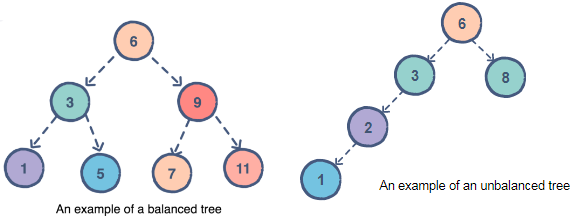

After each insertion or deletion, if the balance factor of any node does not follow the AVL balance property, the AVL tree balances itself through the following rotation techniques:

* Left Rotation
* Right Rotation
* Left-Right Rotation
* Right-Left Rotation

## Time Complexity
Due to the balancing property, the insertion, deletion and search operations take **O(log n)** in both the average and the worst cases. Therefore, AVL trees give us an edge over **Binary Search Trees** which have an **O(n)**
 time complexity in the worst case scenario.

## Space Complexity
The space complexity of an AVL tree is **O(n)**
 in both the average and the worst case.



## Credit:
https://en.wikipedia.org/wiki/AVL_tree

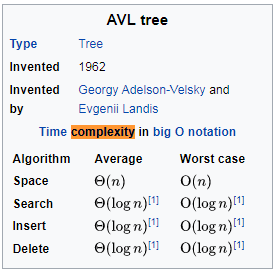

## Credit:
https://medium.com/@natepill/avl-trees-a-complete-guide-and-implementation-addd4516c1d2

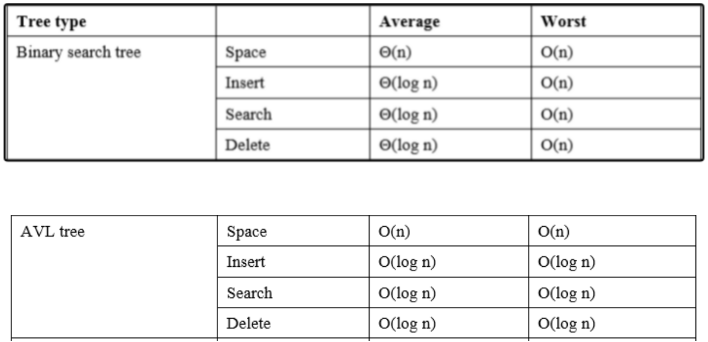